In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import imageio

In [2]:
# Path to the folder containing the chunked data
data_folder = "../data/"
output_folder = "../output/"

# Load the sheet into a DataFrame
FBiH_actual = pd.read_excel(data_folder + 'Quarterly_summary.xlsx', sheet_name='Actual FBiH')
FBiH_predicted = pd.read_excel(data_folder + 'Quarterly_summary.xlsx', sheet_name='Predicted FBiH')
AAA = pd.read_excel(data_folder + 'Quarterly_summary.xlsx', sheet_name='AAA')
RS = pd.read_excel(data_folder + 'Quarterly_summary.xlsx', sheet_name='RS')

In [3]:
# Transpose the dataframes 
transposed_FBiH_actual = FBiH_actual.drop('t', axis=1).T
transposed_FBiH_actual.columns = FBiH_actual['t']
transposed_FBiH_predicted = FBiH_predicted.drop('t', axis=1).T
transposed_FBiH_predicted.columns = FBiH_predicted['t']
transposed_AAA = AAA.drop('t', axis=1).T
transposed_AAA.columns = AAA['t']
transposed_RS = RS.drop('t', axis=1).T
transposed_RS.columns = RS['t']

In [4]:
transposed_AAA

t,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,...,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4
1d,0.947748,0.755346,0.198385,0.094885,0.068905,0.077877,0.071150,0.055646,0.045900,0.021041,...,-0.571233,-0.705125,-0.588938,-0.609483,-0.635314,-0.785632,-0.685661,-0.555099,-0.381887,0.446648
1m,0.982320,0.752493,0.211586,0.091574,0.062584,0.057819,0.055676,0.049820,0.040019,0.019382,...,-0.576468,-0.705233,-0.598794,-0.618457,-0.645345,-0.785026,-0.694137,-0.553762,-0.220156,0.758713
3m,1.053307,0.751697,0.242612,0.091048,0.054823,0.022768,0.028519,0.041081,0.030800,0.019315,...,-0.587594,-0.706776,-0.617763,-0.635377,-0.664513,-0.783529,-0.702080,-0.509104,0.044359,1.241609
6m,1.158303,0.762170,0.297440,0.104716,0.055513,-0.014730,-0.000735,0.035833,0.023996,0.027128,...,-0.604572,-0.711701,-0.642811,-0.656820,-0.689474,-0.780482,-0.695692,-0.385437,0.313795,1.676798
9m,1.261348,0.784803,0.360622,0.133463,0.069331,-0.035964,-0.017422,0.039229,0.024962,0.043541,...,-0.621296,-0.718757,-0.664054,-0.673887,-0.710214,-0.776258,-0.674475,-0.238243,0.485666,1.899530
1y,1.362280,0.817746,0.430577,0.175000,0.094565,-0.042823,-0.022809,0.050438,0.032999,0.067615,...,-0.637242,-0.727032,-0.681792,-0.686944,-0.727080,-0.770712,-0.644014,-0.091431,0.599010,2.003495
1y6m,1.557300,0.908200,0.585473,0.288571,0.173248,-0.020129,-0.004266,0.093264,0.067724,0.135358,...,-0.665350,-0.744533,-0.707854,-0.702374,-0.750464,-0.755454,-0.569113,0.167796,0.734332,2.050536
2y,1.742606,1.022611,0.753140,0.431858,0.280927,0.041428,0.046596,0.158773,0.123463,0.224242,...,-0.686988,-0.760243,-0.723017,-0.705576,-0.761957,-0.734813,-0.488448,0.371459,0.815650,2.029977
3y,2.082617,1.291423,1.101604,0.767744,0.550526,0.243750,0.218230,0.339459,0.282142,0.445580,...,-0.708752,-0.778765,-0.727454,-0.683548,-0.757072,-0.680144,-0.336235,0.647148,0.931933,1.995180
4y,2.381613,1.577725,1.440826,1.124272,0.853067,0.505592,0.448057,0.562033,0.482434,0.699501,...,-0.704157,-0.776960,-0.706566,-0.634683,-0.725486,-0.613600,-0.208228,0.814747,1.031823,2.007235


In [5]:
60*9

540

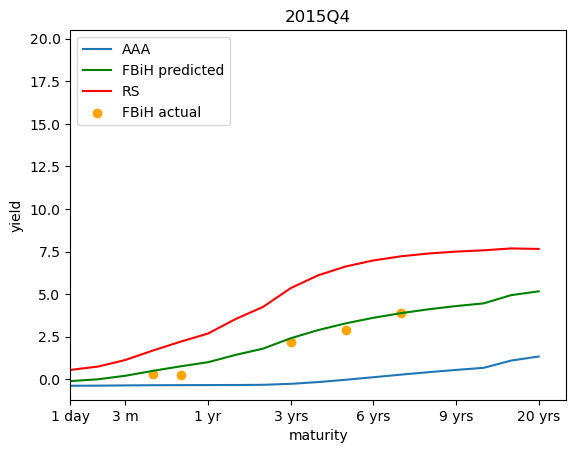

In [6]:
# Create a new figure and axis
fig, ax = plt.subplots()

period = 18
n_maturities = 18
x = np.linspace(0, n_maturities - 1, n_maturities, dtype=int)
ax.plot(x,transposed_AAA.iloc[:, period], label='AAA') 
ax.plot(x,transposed_FBiH_predicted.iloc[:, period], label='FBiH predicted', color='green')
ax.plot(x,transposed_RS.iloc[:, period], label='RS', color='red')
ax.scatter(x,transposed_FBiH_actual.iloc[:, period], label='FBiH actual', color='orange')
# Set axis limits
ax.set_xlim(0,18)
ax.set_ylim(-1.2,20.5)
# Set axis limits
ax.set_xlim(0,18)
ax.set_ylim(-1.2,20.5)
# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend(loc='upper left')

# Define custom x-axis tick locations and labels
#tick = 17/7
#custom_ticks = [0, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
custom_ticks = [0, 2, 5, 8, 11 ,14, 17]
custom_tick_labels = ['1 day', '3 m', '1 yr', '3 yrs', '6 yrs', '9 yrs', '20 yrs']
plt.xticks(custom_ticks, custom_tick_labels)

ax.set_title(transposed_AAA.iloc[:, period].name)

# Display the plot
plt.show()

In [24]:
# Create a list to store the plots
plots = []
dpi = 300
i=0

for period in range(len(AAA['t'])):
#for period in range(10):
    # Create a new figure and axis
    fig, ax = plt.subplots()

    n_maturities = 18
    x = np.linspace(0, n_maturities - 1, n_maturities, dtype=int)
    ax.plot(x,transposed_AAA.iloc[:, period], label='AAA') 
    ax.plot(x,transposed_FBiH_predicted.iloc[:, period], label='FBiH predicted', color='green')
    ax.plot(x,transposed_RS.iloc[:, period], label='RS', color='red')
    ax.scatter(x,transposed_FBiH_actual.iloc[:, period], label='FBiH actual', color='orange')
    
    # Set axis limits
    ax.set_xlim(0,18)
    ax.set_ylim(-1.2,20.5)
    
    # Add labels and legend
    plt.xlabel('maturity')
    plt.ylabel('yield')
    plt.legend(loc='upper left')

    # Define custom x-axis tick locations and labels
    custom_ticks = [0, 2, 5, 8, 11 ,14, 17]
    custom_tick_labels = ['1 day', '3 m', '1 yr', '3 yrs', '6 yrs', '9 yrs', '20 yrs']
    plt.xticks(custom_ticks, custom_tick_labels)

    # Title is the date of the period
    ax.set_title(transposed_AAA.iloc[:, period].name)

    # save plots
    i += 1
    plt.savefig(output_folder + 'plots/' + f'plot_{i}.png', dpi=dpi)

    # Convert plot to image:
    # Create a FigureCanvas instance
    canvas = FigureCanvas(fig)
    canvas.figure.set_dpi(dpi)

    # Render the figure into an image
    canvas.draw()

    # Get the image as a numpy array
    image = np.array(canvas.renderer.buffer_rgba())

    plt.axis('off')

    # Append the plot to the list
    plots.append(image)

    # Close the figure to avoid displaying it
    plt.close(fig)

In [84]:
len(AAA['t'])

47

In [85]:
len(plots)

47

In [86]:
transposed_AAA.iloc[:, 46].name

'2022Q4'

(-0.5, 1919.5, 1439.5, -0.5)

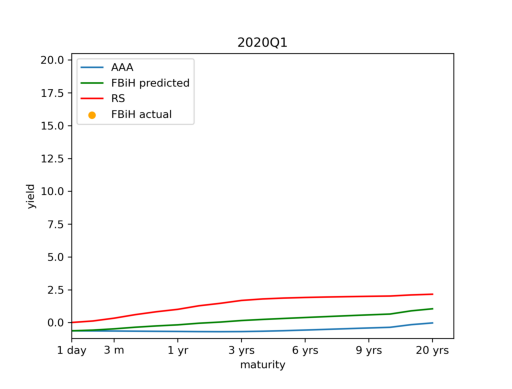

In [20]:
plt.imshow(plots[35])
plt.axis('off')

In [89]:
# Determine the video properties
fps = 10.0  # Frames per second
motion_filename = 'yield_curves_quarterly.mp4'
output_file = output_folder + motion_filename

# Write the images to the video
imageio.mimwrite(output_file, plots, fps=fps)

In [8]:
plots

[array([[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        ...,
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
    

In [9]:
# save plots
i=0
for plot in plots:
    i += 1
    plot.savefig(f'plot{i}.png', output_folder + 'plots/')

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'